# Setting

In [20]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
from scripts.simulator import VariableLocalTransaction
from scripts.price_data.get_price import GetPriceData

price_getter = GetPriceData()

from pprint import pprint

In [21]:
jct_portfolio_A = {
    'JPY': {
        'num': 50000000,
        'is_usd': False
    },
    '8411.T': {
        'num': 100000,
        'is_usd': False
    },
    '8306.T': {
        'num': 100000,
        'is_usd': False
    }
}

# jct_portfolio_B = {
#     'JPY': {
#         'num': 10000000,
#         'is_usd': False
#     }
# }

st_portfolio = {
    'MSFT': {
        'num': 1000,
        'is_usd': True
    },
    '3697.T': {
        'num': 10000,
        'is_usd': False
    },
    '6578.T': {
        'num': 10000,
        'is_usd': False
    },
}

# JCT が取引ごとに独立かつ可変

## シミュレーション

In [22]:
from datetime import date, timedelta

def date_range(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

transaction = VariableLocalTransaction('A', 'B', jct_portfolio_A, st_portfolio, date(2021, 6, 14), 1.05, print_log=True)


print('Start simulation...')
print('='*50)
for date in date_range(date(2021, 6, 15), date(2021, 7, 15)):
    print('='*50)
    print(date)
    transaction.check_diff_and_margin_call(date)
    print('='*50)
print('='*50)
print('Finished.')
# pprint(transaction.logs)
# print(transaction.jct_portfolio)
# print(transaction.st_portfolio)
# print(f'borrower jct num: {transaction.borrower_jct_num}')
# print(f'lender jct num: {transaction.lender_jct_num}')


JCT portfolio: {'JPY': {'num': 50000000, 'is_usd': False}, '8411.T': {'num': 100000, 'is_usd': False}, '8306.T': {'num': 100000, 'is_usd': False}}
ST portfolio: {'MSFT': {'num': 1000, 'is_usd': True}, '3697.T': {'num': 10000, 'is_usd': False}, '6578.T': {'num': 10000, 'is_usd': False}}
2021-06-14: Price updating...
MSFT: 28512.2
3697.T: 16880.0
6578.T: 343.0

2021-06-14: Price updating...
JPY: 1.0
8411.T: 1618.0
8306.T: 604.7

{'borrower_jct_num': 61490690.0,
 'date': datetime.date(2021, 6, 14),
 'jct_difference': 0,
 'jct_price': 1.0,
 'jct_total_value': 272270000.0,
 'lender_jct_num': 210779310.0,
 'lender_jct_total_value': 210779310.0,
 'st_total_value': 210779310.0}
Transaction is made.
Start simulation...
2021-06-15
2021-06-15: Price updating...
MSFT: 28512.2
3697.T: 16590.0
6578.T: 344.0

2021-06-15: Price updating...
JPY: 1.0
8411.T: 1624.5
8306.T: 608.7

OK. JCT is moved.
{'borrower_jct_num': 65323176.0,
 'date': datetime.date(2021, 6, 15),
 'jct_difference': -3832486,
 'jct_pr

2021-06-29: Price updating...
MSFT: 29780.0
3697.T: 16840.0
6578.T: 335.0

2021-06-29: Price updating...
JPY: 1.0
8411.T: 1596.0
8306.T: 601.5

OK. JCT is moved.
{'borrower_jct_num': 58686571.0,
 'date': datetime.date(2021, 6, 29),
 'jct_difference': 6863133,
 'jct_price': 0.990744,
 'jct_total_value': 269750000.0,
 'lender_jct_num': 213583429.0,
 'lender_jct_total_value': 204806892.940224,
 'st_total_value': 201530000.0}
2021-06-30
2021-06-30: Price updating...
MSFT: 30017.6
3697.T: 17210.0
6578.T: 332.0

2021-06-30: Price updating...
JPY: 1.0
8411.T: 1587.5
8306.T: 600.0

OK. JCT is moved.
{'borrower_jct_num': 53735082.0,
 'date': datetime.date(2021, 6, 30),
 'jct_difference': 4951489,
 'jct_price': 0.987071,
 'jct_total_value': 268750000.0,
 'lender_jct_num': 218534918.0,
 'lender_jct_total_value': 210822008.846459,
 'st_total_value': 205437600.0}
2021-07-01
2021-07-01: Price updating...
MSFT: 29943.9
3697.T: 16940.0
6578.T: 332.0

2021-07-01: Price updating...
JPY: 1.0
8411.T: 1587

8306.T: 596.7

OK. JCT is moved.
{'borrower_jct_num': 15388661.0,
 'date': datetime.date(2021, 7, 14),
 'jct_difference': 3268530,
 'jct_price': 0.986226,
 'jct_total_value': 268520000.0,
 'lender_jct_num': 256881339.0,
 'lender_jct_total_value': 250119546.168834,
 'st_total_value': 241279100.0}
Finished.


## ログの可視化

In [27]:
logs = transaction.logs
date_list = [log['date'] for log in logs]
jct_price_list = [log['jct_price'] for log in logs]
st_total_value_list = [log['st_total_value'] for log in logs]
borrower_jct_num_list = [log['borrower_jct_num'] for log in logs]
lender_jct_num_list = [log['lender_jct_num'] for log in logs]
jct_diff_num_list = [log['jct_difference'] for log in logs]
from matplotlib.ticker import ScalarFormatter

Text(0.5, 1.0, '差入れ JCT')

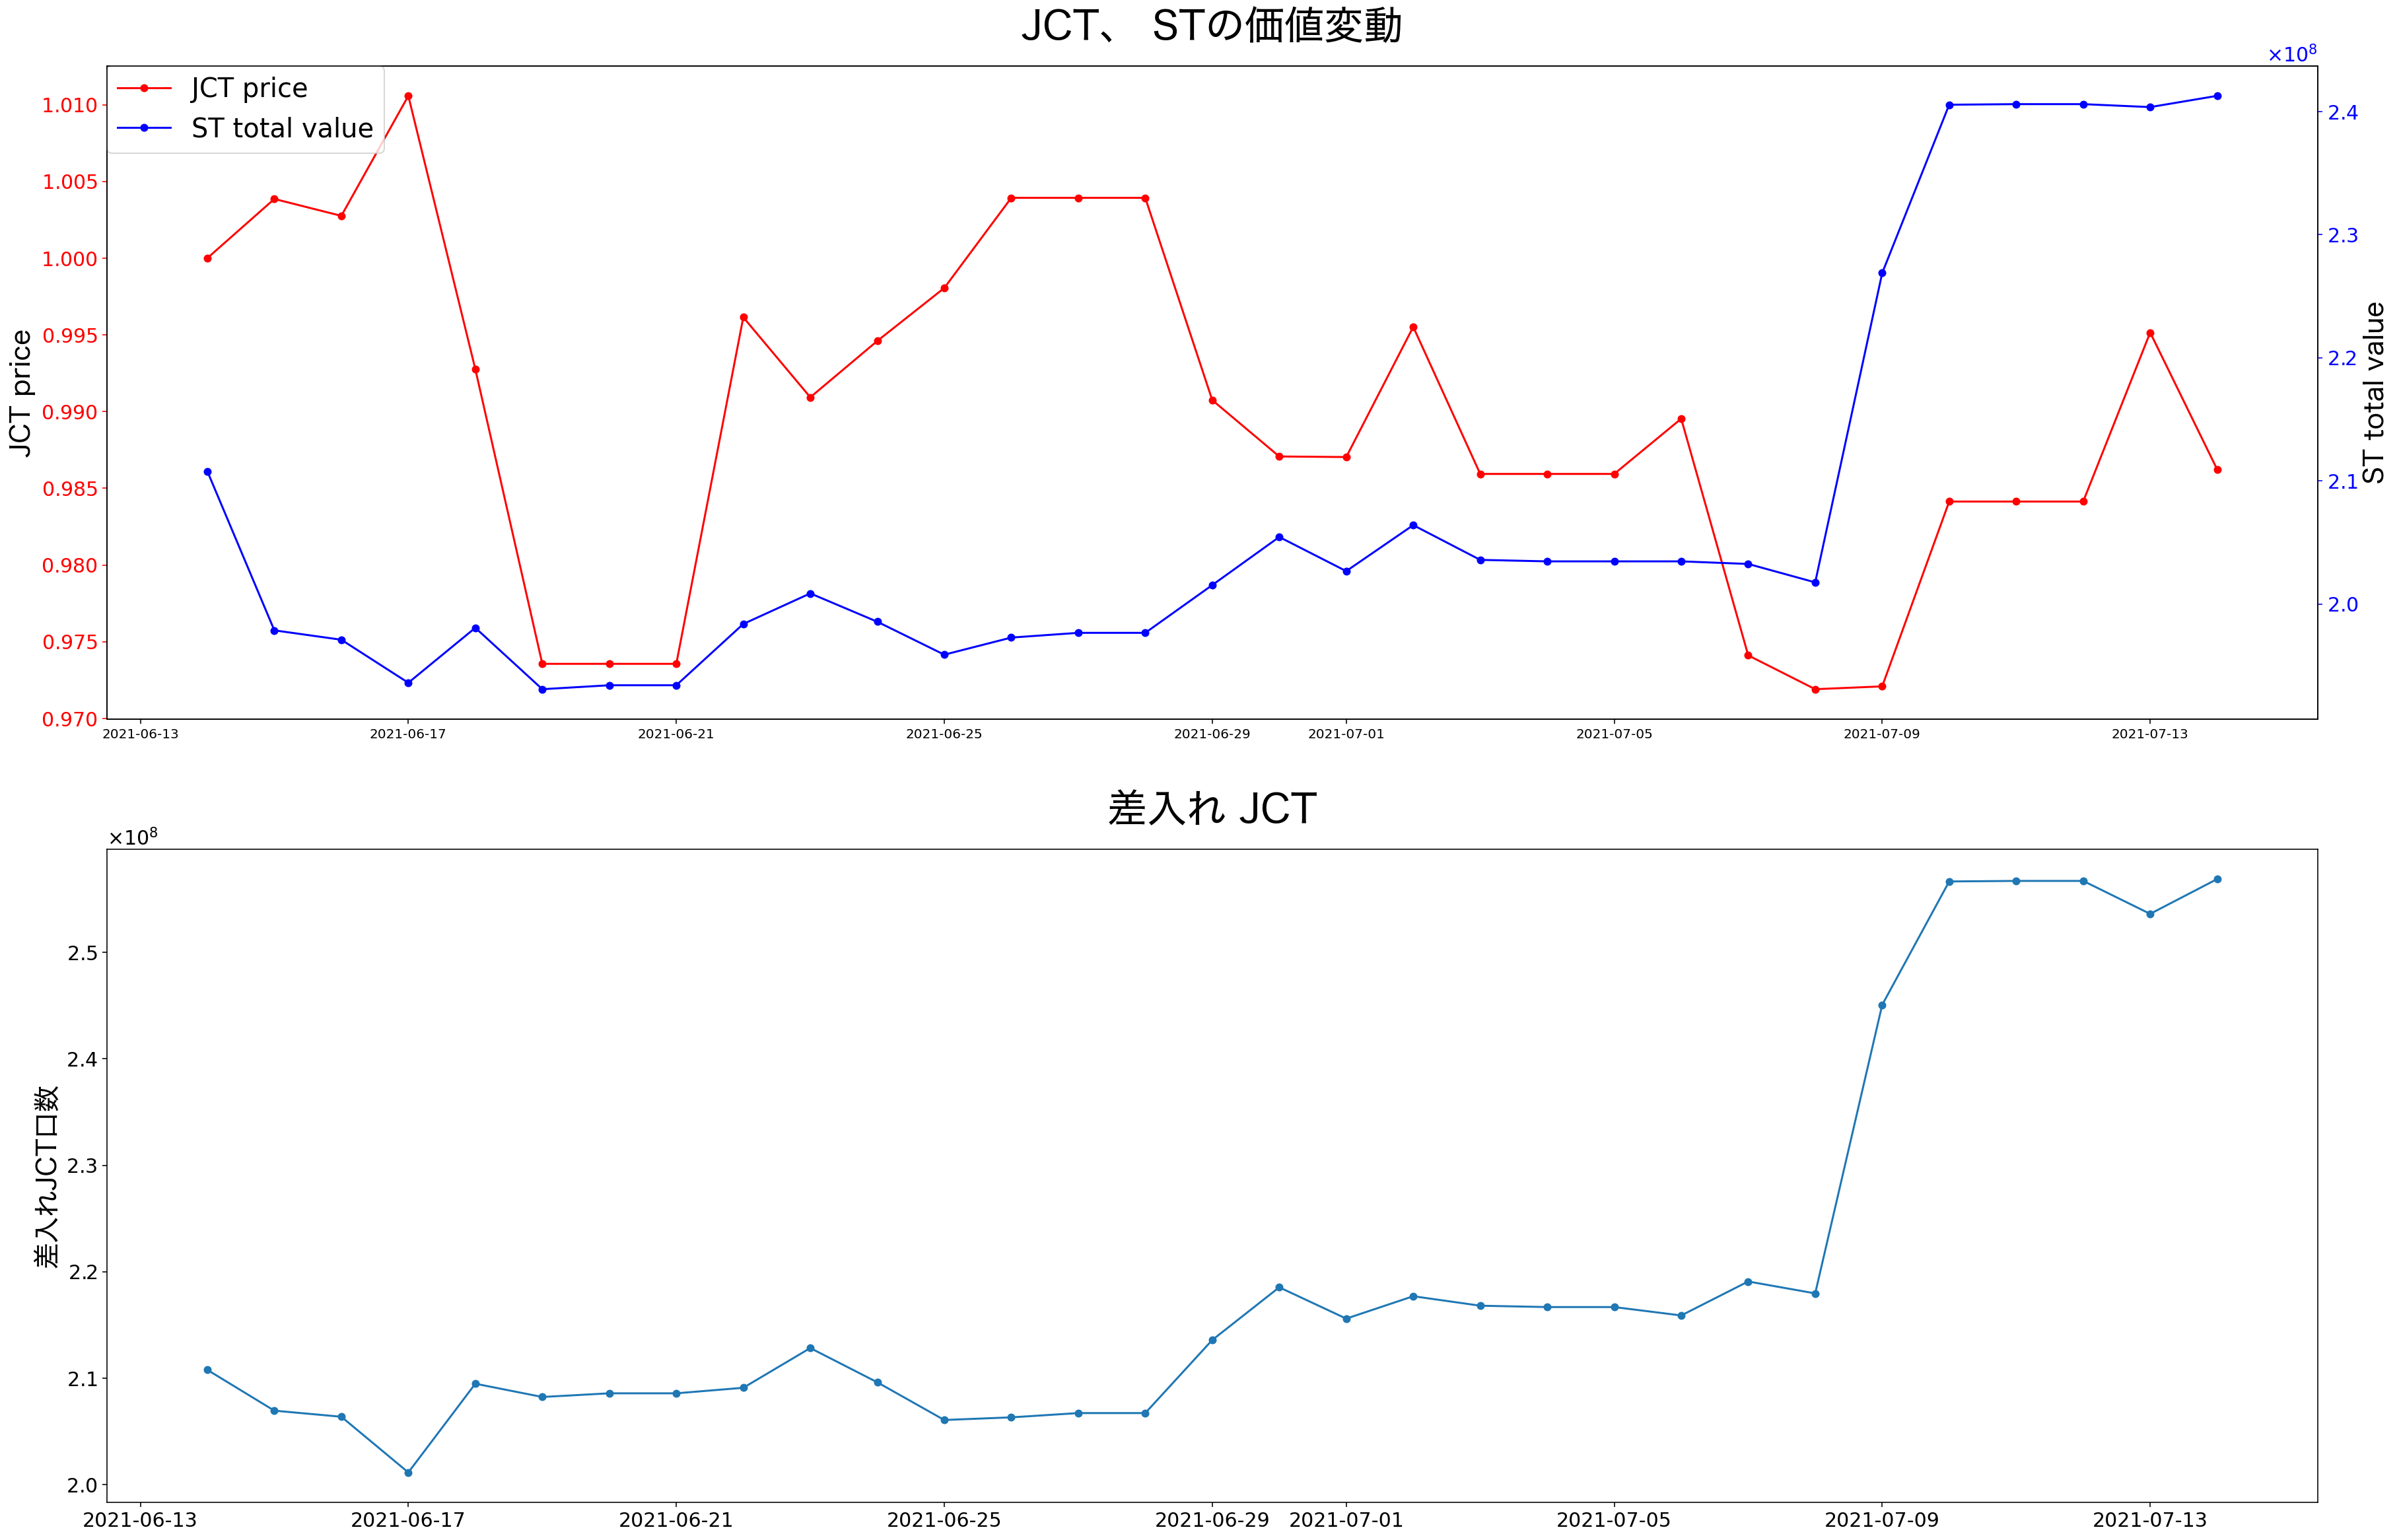

In [44]:
fig = plt.figure(figsize=(30,20))
# fig, ax1 = plt.subplots(figsize=(20,10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax1_2 = ax1.twinx()

plt.title('JCT、 STの価値変動', fontsize=30, pad=20, fontname="Hiragino Sans")
ax1.plot(date_list, jct_price_list, marker='o', markersize=5, color='red', label='JCT price')
ax1.set_ylabel('JCT price', fontsize=20, fontname="Hiragino Sans")
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1_2.plot(date_list, st_total_value_list, marker='o', markersize=5, color='blue', label='ST total value')
ax1_2.set_ylabel('ST total value', fontsize=20, fontname="Hiragino Sans")
ax1_2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax1_2.get_legend_handles_labels()

ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0., fontsize=20)
ax1.tick_params(axis='y', colors='red', labelsize=15)
ax1.yaxis.offsetText.set_fontsize(15)
ax1.xaxis.offsetText.set_fontsize(15)
ax1_2.xaxis.offsetText.set_fontsize(15)
ax1_2.tick_params(axis='y', colors='blue', labelsize=15)
ax1_2.yaxis.offsetText.set_fontsize(15)

ax2.plot(date_list, lender_jct_num_list, marker='o', markersize=5)
ax2.set_ylabel('差入れJCT口数', fontsize=20, fontname="Hiragino Sans")
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax2.tick_params(labelsize=15)
ax2.yaxis.offsetText.set_fontsize(15)
ax2.set_title('差入れ JCT', fontsize=30, pad=20, fontname="Hiragino Sans")

Text(0.5, 1.0, '差入れ JCT')

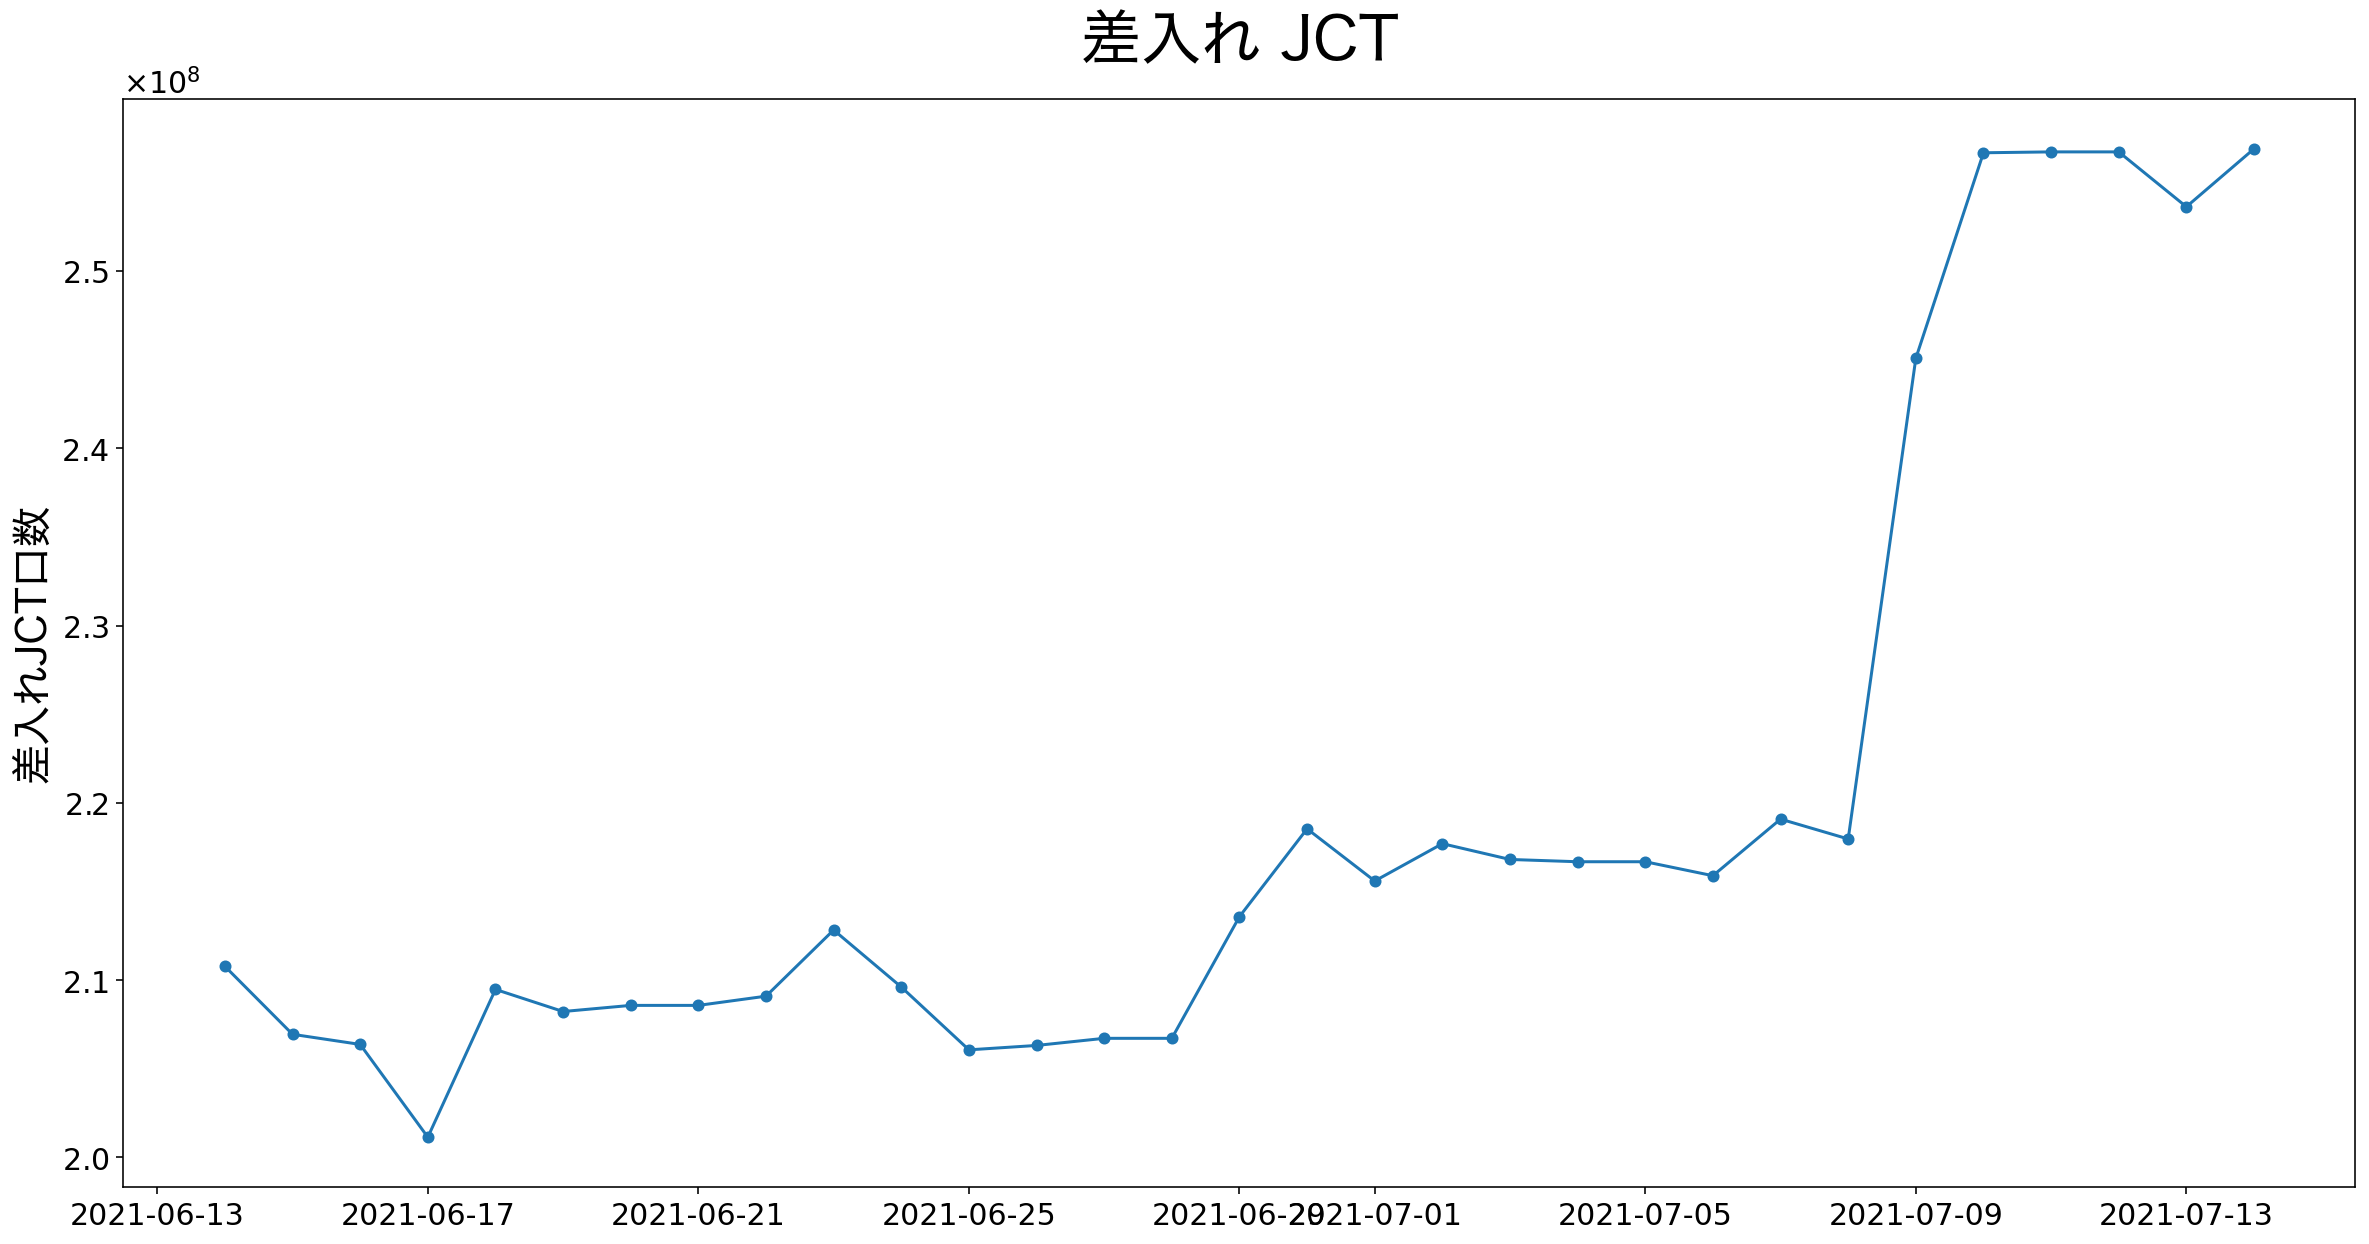

In [31]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(date_list, lender_jct_num_list, marker='o', markersize=5)
ax.set_ylabel('差入れJCT口数', fontsize=20, fontname="Hiragino Sans")
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.tick_params(labelsize=15)
ax.yaxis.offsetText.set_fontsize(15)
ax.set_title('差入れ JCT', fontsize=30, pad=20, fontname="Hiragino Sans")

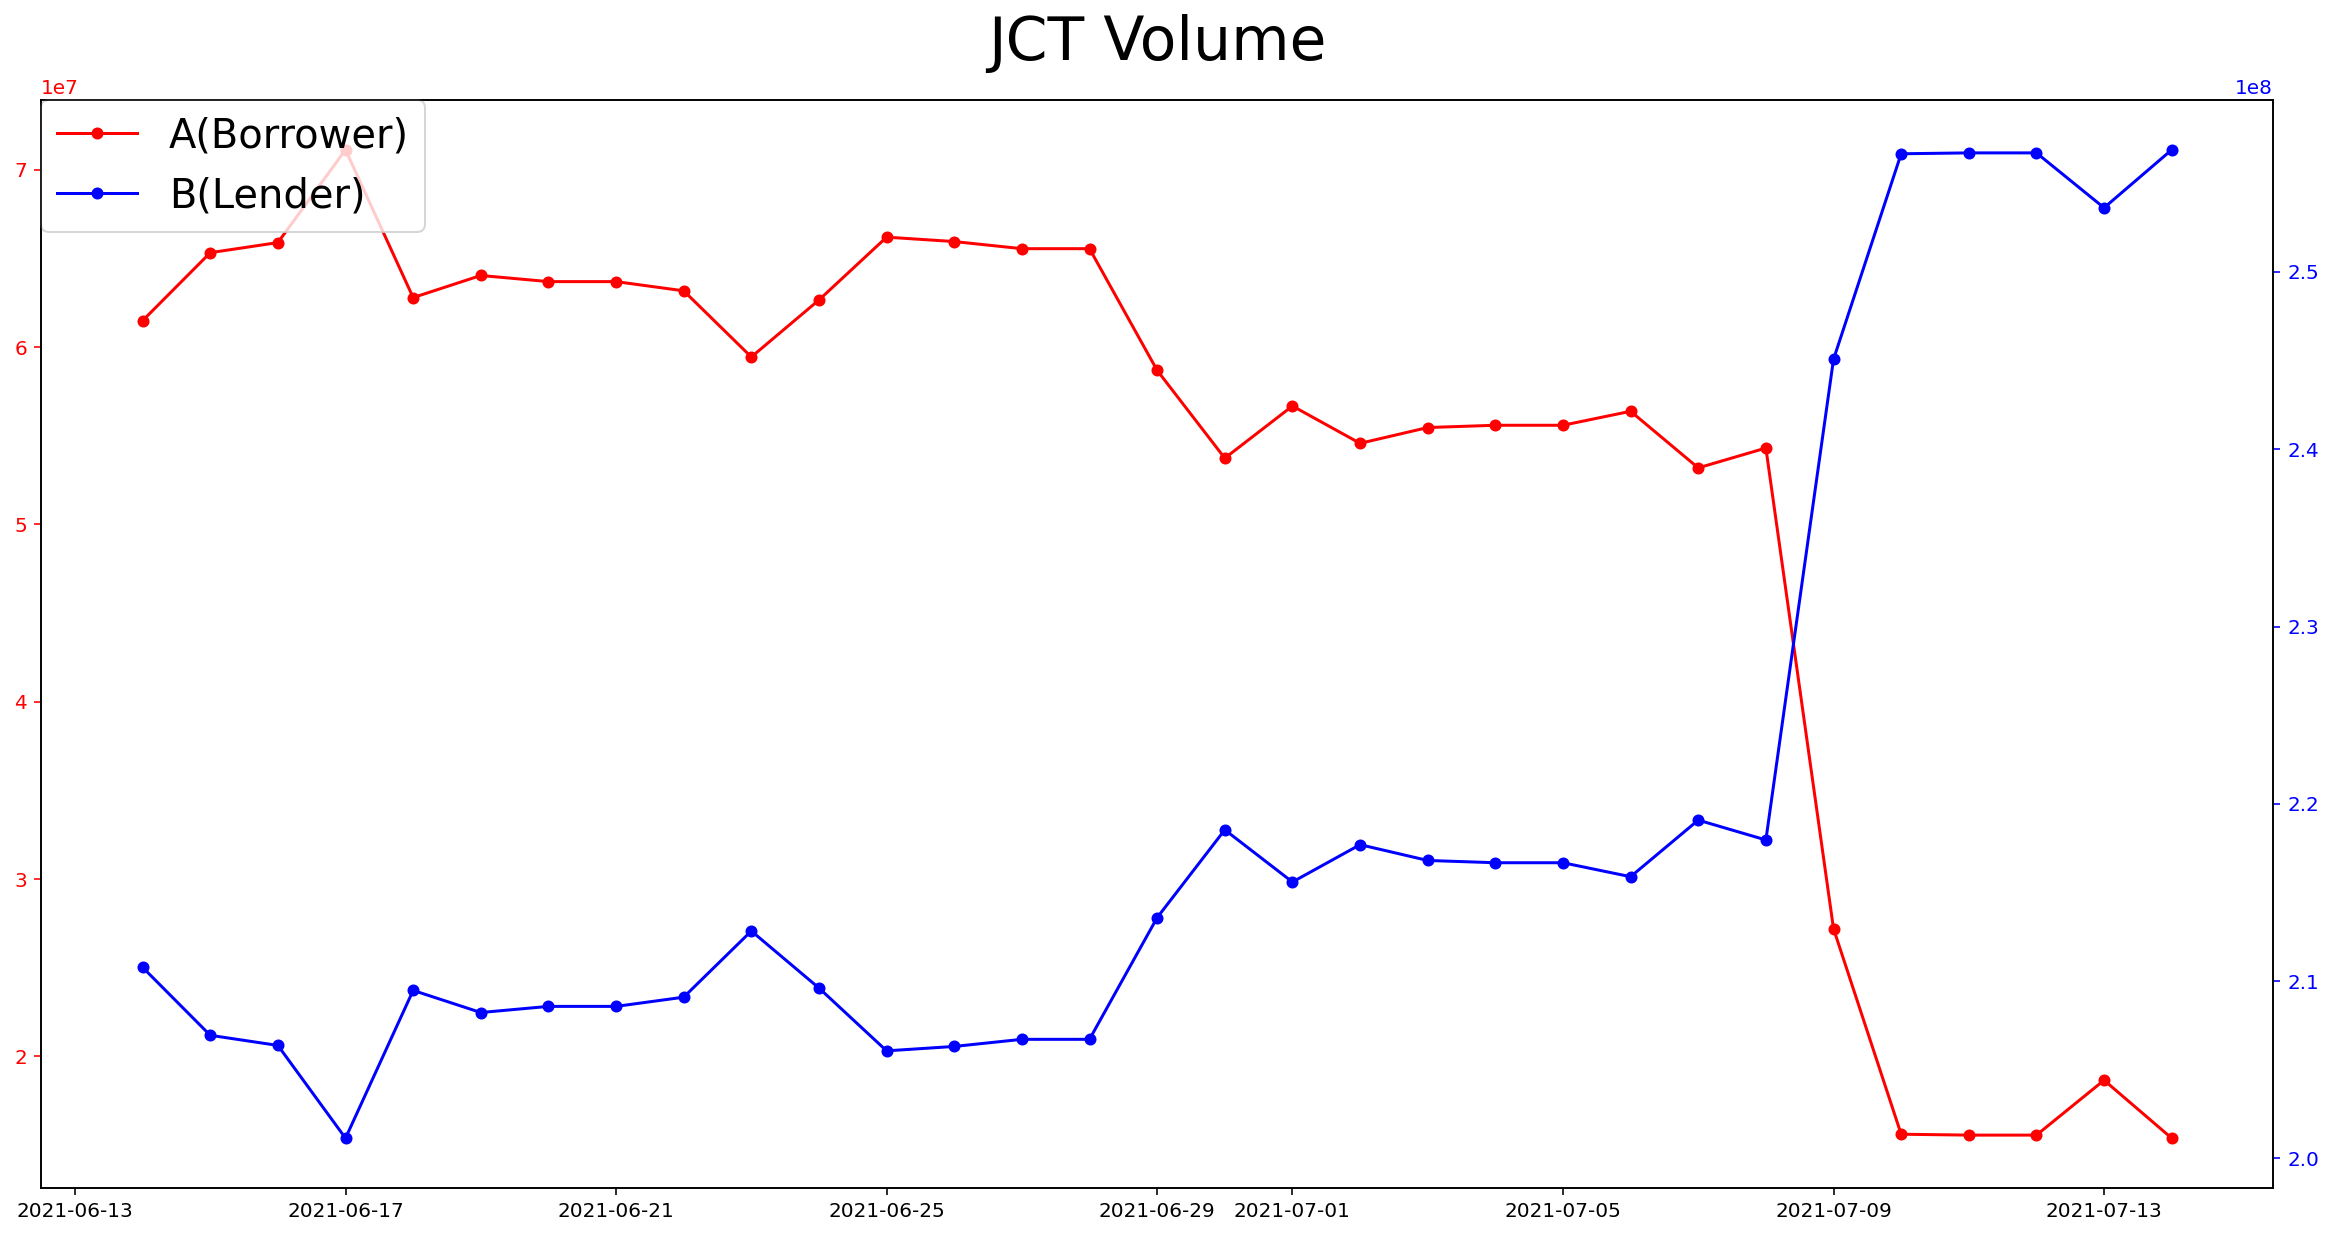

In [17]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax2 = ax1.twinx()

plt.title('JCT Volume', fontsize=30, pad=20)
ax1.plot(date_list, borrower_jct_num_list, marker='o', markersize=5, color='red', label='A(Borrower)')
# ax1.set_ylabel()
ax2.plot(date_list, lender_jct_num_list, marker='o', markersize=5, color='blue', label='B(Lender)')
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()

ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0., fontsize=20)
ax1.tick_params(axis='y', colors='red')
ax2.tick_params(axis='y', colors='blue')

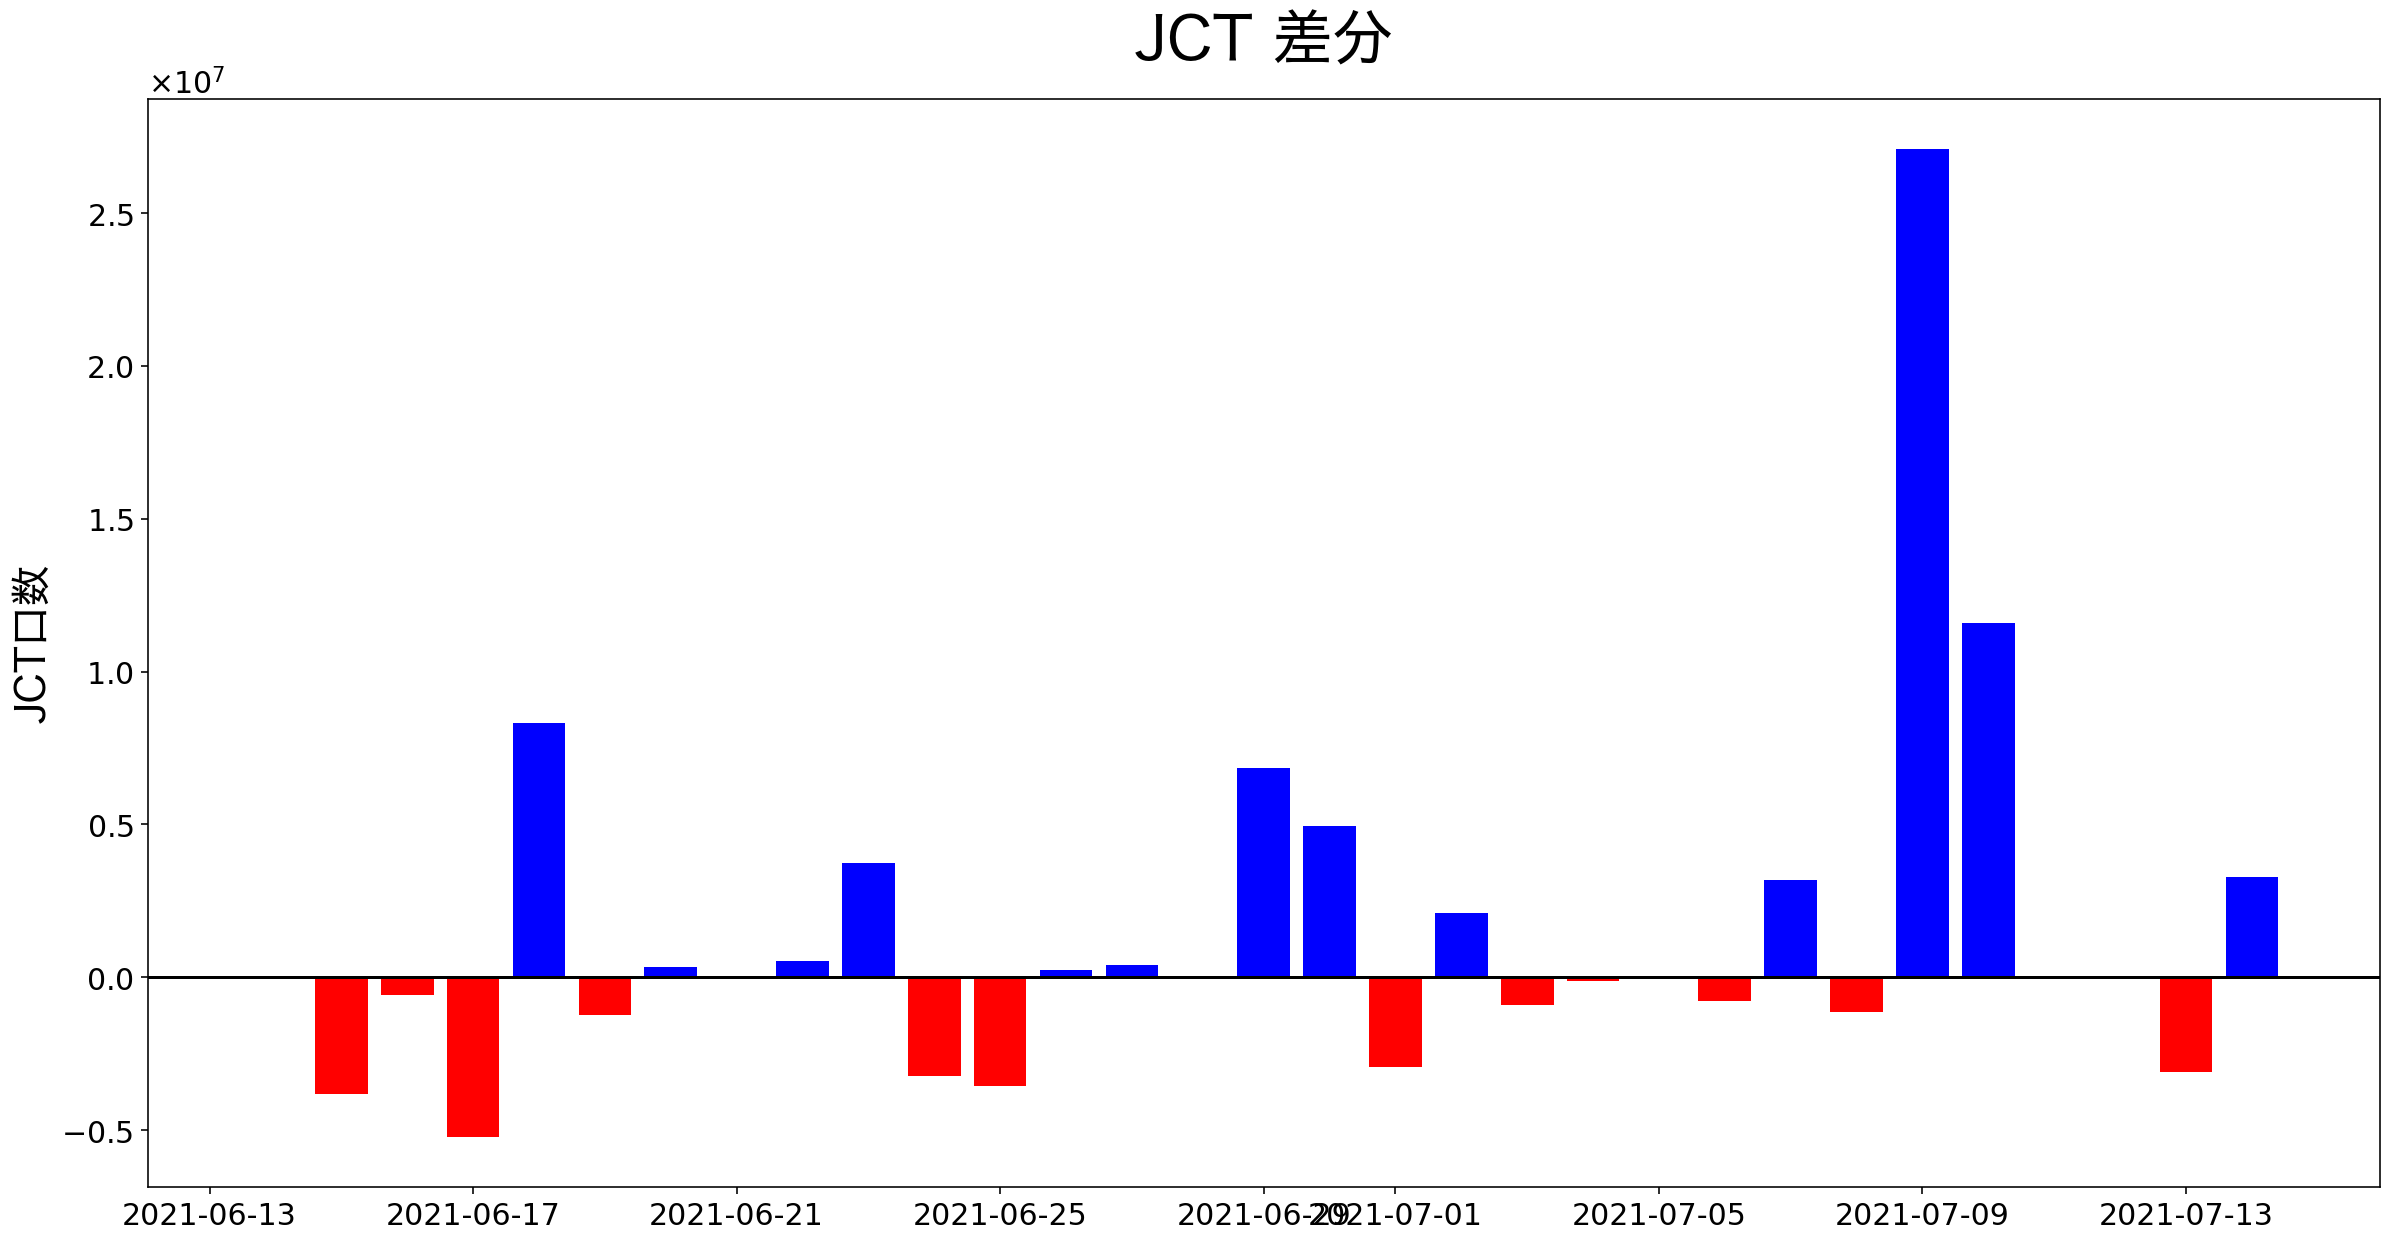

In [38]:
# plt.figure(figsize=(20,10))
# jct_diff_num_color = ['blue' if diff > 0 else 'red' for diff in jct_diff_num_list]

# plt.bar(date_list, jct_diff_num_list, color=jct_diff_num_color)
# plt.title('JCT 差分', fontsize=30, pad=20, fontname="Hiragino Sans")
# plt.ylabel('JCT口数', fontsize=20, fontname='Hiragino Sans')
# plt.axhline(0, color='black')

fig, ax = plt.subplots(figsize=(20,10))
jct_diff_num_color = ['blue' if diff > 0 else 'red' for diff in jct_diff_num_list]

ax.bar(date_list, jct_diff_num_list, color=jct_diff_num_color)
ax.set_title('JCT 差分', fontsize=30, pad=20, fontname="Hiragino Sans")
ax.set_ylabel('JCT口数', fontsize=20, fontname='Hiragino Sans')
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.tick_params(labelsize=15)
ax.yaxis.offsetText.set_fontsize(15)
ax.axhline(0, color='black')

# JCT 固定